In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [102]:
#데이터 준비
train = pd.read_csv("C:/Users/Administrator/데이터모음/따릉이/train.csv")
test = pd.read_csv("C:/Users/Administrator/데이터모음/따릉이/test.csv")
submission = pd.read_csv("C:/Users/Administrator/데이터모음/따릉이/submission.csv")

In [103]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [104]:
test

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [105]:
unique_len = train.apply(lambda x: len(x.unique()))
unique_len

id                        1459
hour                        24
hour_bef_temperature       246
hour_bef_precipitation       3
hour_bef_windspeed          74
hour_bef_humidity           92
hour_bef_visibility        782
hour_bef_ozone              96
hour_bef_pm10              149
hour_bef_pm2.5              80
count                      314
dtype: int64

In [106]:
#결측치확인

train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


#id는 중복이 되는것이 없다 그러므로 각 지역의 id는 아니라는 소리다\
#삭제시켜두 될거 같다\
아니다 있어야한다

In [108]:
train.shape

(1459, 11)

In [109]:
test.shape

(715, 10)

In [110]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [111]:
from sklearn.ensemble import RandomForestRegressor

flput32 객체가 들어잇으면 돌아가지 않음\
int형으로 바꾸자

In [112]:
np.int64(train['hour_bef_temperature'])

array([16, 20, 13, ..., 18, 20, 21], dtype=int64)

In [113]:
train['hour_bef_temperature']

0       16.3
1       20.1
2       13.9
3        8.1
4       29.5
        ... 
1454    16.8
1455    10.8
1456    18.3
1457    20.7
1458    21.1
Name: hour_bef_temperature, Length: 1459, dtype: float64

In [114]:
train = train.apply(lambda x: np.int64(x))
test = test.apply(lambda x: np.int64(x))

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id                      1459 non-null   int64
 1   hour                    1459 non-null   int64
 2   hour_bef_temperature    1459 non-null   int64
 3   hour_bef_precipitation  1459 non-null   int64
 4   hour_bef_windspeed      1459 non-null   int64
 5   hour_bef_humidity       1459 non-null   int64
 6   hour_bef_visibility     1459 non-null   int64
 7   hour_bef_ozone          1459 non-null   int64
 8   hour_bef_pm10           1459 non-null   int64
 9   hour_bef_pm2.5          1459 non-null   int64
 10  count                   1459 non-null   int64
dtypes: int64(11)
memory usage: 125.5 KB


In [116]:
train_x = train.drop("count", axis = 1)
train_y = train['count']

In [120]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=80)
clf.fit(train_x, train_y)

RandomForestRegressor(n_estimators=80)

In [121]:
pr = clf.predict(train_x)
print(pr)

[ 52.4125 159.1375  27.175  ...  20.2    210.525  178.575 ]


In [122]:
pr = clf.predict(test)
print(pr)

[ 96.775  242.925   89.4875  29.525   62.9375 127.325  164.325  321.525
  27.025  131.45   285.0125 279.3625 121.7375  37.95   230.3625 168.575
  27.1625 154.7875 368.2375 201.6875 239.3     92.2625  16.55   162.875
 164.3875 113.825   25.925  125.35   109.1125 138.875   80.125   27.0625
  69.45   134.625  278.1625  26.35   144.1625  87.45   219.675   83.15
  61.55   122.1    161.5125  86.85   311.6125 168.9875  99.6125  68.625
  16.225   86.7375 242.4375  91.95   172.7875  78.35   209.075  175.7
  44.625  194.9     14.8375  17.5875 106.5625  82.7125 279.2125 299.9375
 130.4125 295.05    14.0375 217.9625 100.5375  29.0875  98.2625  32.2125
 169.2375  15.4875 308.2625 239.45    37.6    184.025  256.1     16.1375
 266.025  132.775   95.15    86.7125 102.275  319.875   54.975  150.05
 116.975  268.9125 277.275  218.6875  68.1125 103.1375  35.9875  87.2875
 103.9875  28.425  243.5875 131.95    18.2375 132.2875  44.3625 119.5
  65.5875  59.     102.475   18.875  164.2875 123.925  215.725  2

In [89]:
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [94]:
submission.iloc[:,1:] = pr 

In [95]:
submission

,id,count
0,0,95.09
1,1,248.61
2,2,99.02
3,4,29.26
4,5,61.80
...,...,...
710,2148,53.17
711,2149,66.26
712,2165,113.10
713,2166,180.02


In [96]:
submission.to_csv("따릉이전처리 기본.csv", index = False)

In [140]:
#변수중요0도
list(clf.feature_importances_)

[0.035262585578389974,
 0.6004302253429709,
 0.17179652550657004,
 0.018594385904996295,
 0.01667518138616996,
 0.04697713079269277,
 0.04166585119184063,
 0.0016532635487629683,
 0.04080592584442591,
 0.026138924903180566]

In [133]:
train_x.dtypes.index

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

In [134]:
#변수중요도 그래프 그리기
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)#데이터 정렬(내림차순)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

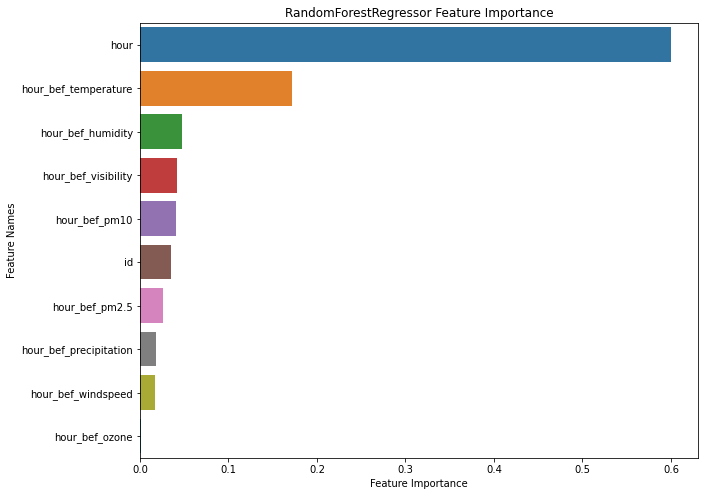

In [139]:
plot_feature_importance(clf.feature_importances_,test.columns,'RandomForestRegressor')

# 두번째 도전

### 처음에는 안했던 결측치 처리

In [149]:
#데이터 준비
train = pd.read_csv("C:/Users/Administrator/데이터모음/따릉이/train.csv")
test = pd.read_csv("C:/Users/Administrator/데이터모음/따릉이/test.csv")
submission = pd.read_csv("C:/Users/Administrator/데이터모음/따릉이/submission.csv")

In [150]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [154]:
train = train.dropna(axis = 0)
train
#130개 정도 사라졌지만 나쁘지 않다

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


### 파생변수를 만들어 보자

#맨처음 위에 변수중요도를 추출 했을때 오존은 의미가 없다고 나온다\
#그러므로 오존 데이터는 삭제/그리고 새로운 변수로 클러스터링을 해볼려고 한다 ID와 기온 변수 말고는 변수중요도가 너무 낮게 나와서

In [159]:
#또 flout가 들어가 있으면 모델이 안돌아간다 위에처럼 그냥 데이터 타입을 바꾸자
train = train.apply(lambda x: np.int64(x))
test = test.apply(lambda x: np.int64(x))

In [161]:
train_x = train.drop("count", axis = 1)
train_y = train['count']

########군집화를 할려면 변수가 11개이상이어야 하는거 같다 군집화 파생변수전에 2개더만들자

In [165]:
#군집화
from sklearn.cluster import KMeans

kmeans_train = train.drop(['count'], axis=1)

kmeans = KMeans(n_clusters=5, random_state=42).fit(kmeans_train)
train['cluster'] = kmeans.predict(kmeans_train)
test['cluster'] = kmeans.predict(test)

ValueError: X has 10 features, but KMeans is expecting 11 features as input.